In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df_mushroom=pd.read_csv('Mushroom_Dataset.csv')
df_mushroom


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
# Lets use the describe function
df_mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


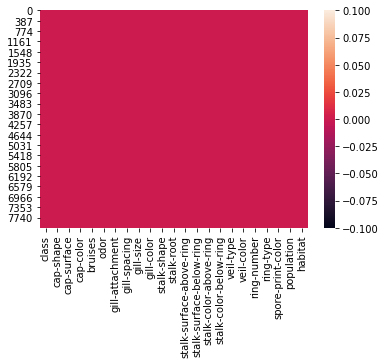

In [4]:
# Checking the null values using heatmap.
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_mushroom.isnull())
plt.show()
# thus, there are no null values present.

In [5]:
# checking the null values without visualization.
df_mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
df_mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

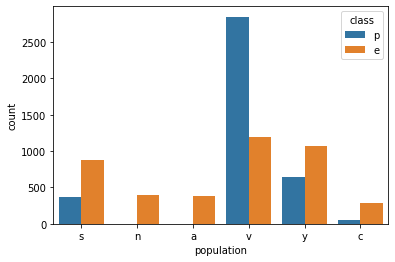

In [8]:
sns.countplot(x="population",hue="class",data=df_mushroom)
plt.show()

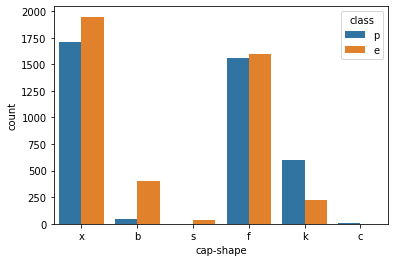

In [9]:
sns.countplot(x="cap-shape",hue="class",data=df_mushroom)
plt.show()


In [10]:
#Lets seprate the input and output variable
x = df_mushroom.drop(columns=["class"])
y = df_mushroom[["class"]]

In [11]:
#we will convert the input into into integers using get_dummies
x = pd.get_dummies(x,drop_first=True)

In [12]:
x.shape

(8124, 95)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.02219484, -0.79620985, -0.33687808, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.02219484, -0.79620985, -0.33687808, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.02219484, -0.79620985, -0.33687808, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.02219484,  1.2559503 , -0.33687808, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.02219484, -0.79620985,  2.96843295, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.02219484, -0.79620985, -0.33687808, ..., -0.40484176,
        -0.21782364, -0.15558197]])

In [14]:
y.shape

(8124, 1)

In [15]:
y = pd.get_dummies(y,drop_first=True)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = r_state, test_size = 0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test, y_pred)
    print("r2 score corresponding to random state: ", r_state,"is: ", r2_scr)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
print("max r2 score corresponding to ",final_r_state," is : ",max_r_score)

r2 score corresponding to random state:  42 is:  1.0
r2 score corresponding to random state:  43 is:  1.0
r2 score corresponding to random state:  44 is:  1.0
r2 score corresponding to random state:  45 is:  1.0
r2 score corresponding to random state:  46 is:  1.0
r2 score corresponding to random state:  47 is:  1.0
r2 score corresponding to random state:  48 is:  1.0
r2 score corresponding to random state:  49 is:  1.0
r2 score corresponding to random state:  50 is:  1.0
r2 score corresponding to random state:  51 is:  1.0
r2 score corresponding to random state:  52 is:  1.0
r2 score corresponding to random state:  53 is:  1.0
r2 score corresponding to random state:  54 is:  1.0
r2 score corresponding to random state:  55 is:  1.0
r2 score corresponding to random state:  56 is:  1.0
r2 score corresponding to random state:  57 is:  1.0
r2 score corresponding to random state:  58 is:  1.0
r2 score corresponding to random state:  59 is:  1.0
r2 score corresponding to random state:  60 is

In [17]:
# Lets do the cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(), x, y, cv=5, scoring = "r2").mean()

# The below cross validation score is equal.

0.9048557136367293

In [18]:
# Thus creating the final model.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = r_state, test_size = 0.20)
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

In [19]:
# Lets evaluate RMSE and r2 score using sklearn library
import numpy as np
print("r2 score is : ",r2_score(y_test, y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score is :  1.0
RMSE is :  2.2055068488698877e-15


In [20]:
# saving the model using joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(lr, 'lr_mushroom.pkl')

['lr_mushroom.pkl']